In [331]:
import pandas as pd

df = pd.read_csv(r'D:\Jupyter\Data\auto_ins.csv',encoding='gb2312')
df

,EngSize,Age,Gender,Marital,exp,Owner,vAge,Garage,AntiTFD,import,Loss
0,2.0,56,男,已婚,20,公司,10,有,有防盗装置,进口,0.0
1,1.8,41,男,已婚,20,公司,9,有,无防盗装置,国产,0.0
2,2.0,44,男,未婚,20,公司,8,有,有防盗装置,国产,0.0
3,1.6,56,男,已婚,20,公司,7,有,有防盗装置,国产,0.0
4,1.8,45,男,已婚,20,公司,7,无,无防盗装置,国产,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4228,1.8,22,女,未婚,0,私人,1,有,有防盗装置,国产,976.0
4229,2.5,22,男,未婚,0,私人,1,有,无防盗装置,进口,855.6
4230,1.8,21,男,未婚,0,私人,1,有,无防盗装置,国产,0.0
4231,1.8,21,女,未婚,0,私人,1,有,无防盗装置,进口,3328.0


In [332]:
df['Owner'].value_counts()

私人    3027
公司     869
政府     337
Name: Owner, dtype: int64

In [333]:
np.array(df['Owner'].value_counts().index)

array(['私人', '公司', '政府'], dtype=object)

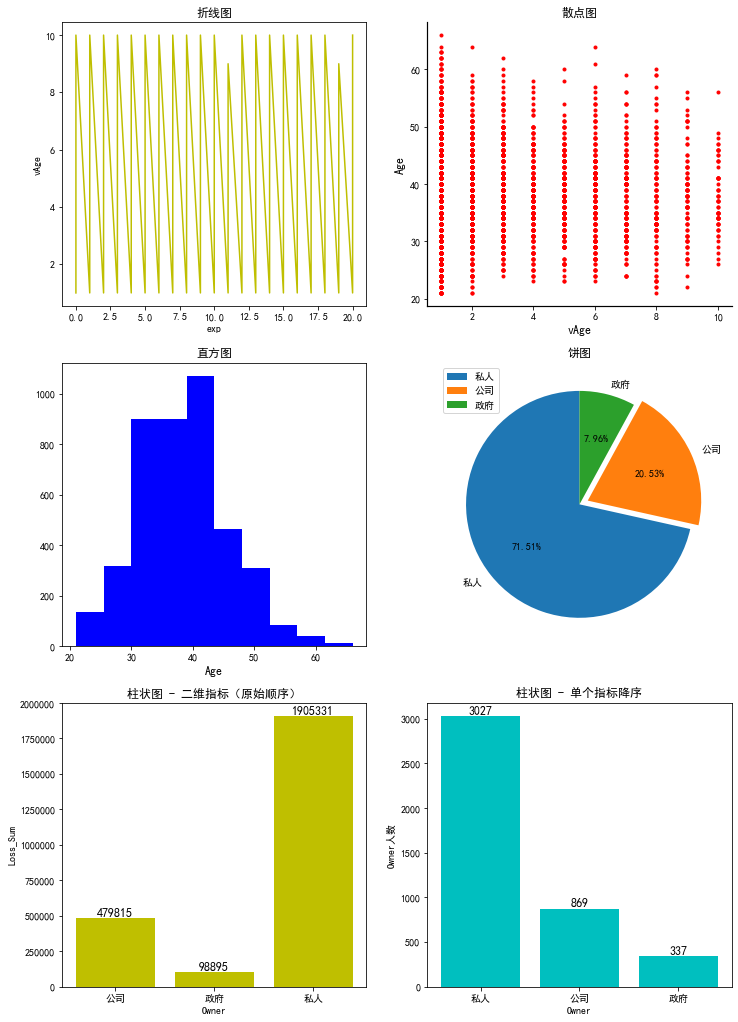

In [335]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

plt.figure(figsize=(12,24))    # 定义画布大小

# -------- 折线图 ---------------------------------------------
plt.subplot(421)
plt.plot(df['exp'],df['vAge'],color='y',linestyle='-')
plt.xlabel('exp')
plt.ylabel('vAge')
plt.title('折线图')

# -------- 散点图 ---------------------------------------------
plt322 = plt.subplot(422)
plt.scatter(df['vAge'],df['Age'],color='r',marker='.')
plt.xlabel('vAge',color='k',fontsize=12)
plt.ylabel('Age',color='k',fontsize=12)
# 去掉顶端和右边方框线条
plt322.spines['bottom'].set_linewidth(1.2)
plt322.spines['left'].set_linewidth(1.2)
plt322.spines['top'].set_visible(False)
plt322.spines['right'].set_visible(False)
plt.title('散点图')

# -------- 直方图 ---------------------------------------------
plt.subplot(423)
plt.hist(df['Age'],color='b')
plt.xlabel('Age',fontsize=12)
plt.title('直方图')

# -------- 饼图 -----------------------------------------------
plt.subplot(424)
# 饼图需要统计value_counts()
labels = df['Owner'].value_counts().index.tolist()    # labels要自动获取，否则手写可能会出现位置对不上的错误
plt.pie(df['Owner'].value_counts(),startangle=90,labels=labels,explode=[0,.08,0],autopct='%.2f%%',shadow=False)
# 显示图例
plt.legend()
plt.title('饼图')

# -------- 柱状图 - 二维指标（原始顺序） -------------------------
# 由df.groupby('Owner')['Loss'].sum().index可知，原始顺序为：公司、政府、私人
plt.subplot(425)
# 按原来默认index排序
xaxis_order = np.arange(len(df.groupby('Owner')['Loss'].sum()))    # 新增一个用于排序的x轴
xsticklabels = np.array(df.groupby('Owner')['Loss'].sum().index)
plt.xticks(xaxis_order,labels=xsticklabels)
y = df.groupby('Owner')['Loss'].sum().values    # 需要计算二维指标的值
plt.bar(xaxis_order,y,color='y')    # 需要用新定义的x轴来画图
# 增加数值标签
for a, b in zip(xaxis_order, y):
    plt.text(a, b, '%d' %round(b), ha='center', va='bottom',fontsize=12)
plt.xlabel('Owner')
plt.ylabel('Loss_Sum')
plt.title('柱状图 - 二维指标（原始顺序）')


# -------- 柱状图 - 单个指标降序 ------------------------------
plt.subplot(426)
# 按降序排序【方法：plt.bar之后的x轴，改用自定义的array】
factordata = df['Owner'].value_counts().values    # 必须为array形式
xaxislabel = np.array(df['Owner'].value_counts().index)    # 必须为array形式
x = xaxislabel[np.argsort(-factordata)]    # 去掉负号即为升序排序
y = factordata[np.argsort(-factordata)]    # 去掉负号即为升序排序
xaxis_order = np.arange(len(df['Owner'].value_counts()))    # 新增一个用于排序的x轴
plt.xticks(xaxis_order,x)
plt.bar(xaxis_order,y,color='c')    # 需要用新定义的x轴来画图
# 增加数值标签
for a, b in zip(xaxis_order, y):
    plt.text(a, b, str(b), ha='center', va='bottom',fontsize=12)
plt.xlabel('Owner')
plt.ylabel('Owner人数')
plt.title('柱状图 - 单个指标降序')

plt.savefig(r"D:\Jupyter\Data\commonplot.png",dpi=600)
plt.show()    # show之后，无法导出图片

In [310]:
?plt.xticks

【学习链接】

matlibplot.pyplot 画图 axes.bar() x轴默认排序解决方法：https://blog.csdn.net/qq_35318838/article/details/80198307
python matplotlib 柱状图x轴xsticks固定顺序（升序、降序）：https://www.optbbs.com/thread-3214172-1-1.html